In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/nithy/OneDrive/Desktop/Phase 2/Project 2/hr_dataset.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
print("Shape of dataset:", df.shape)

Shape of dataset: (1470, 35)


In [15]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [13]:
print("Data types:\n", df.dtypes)

Data types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

In [17]:
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df.drop(columns=drop_cols, inplace=True)
print(f"Dropped columns: {drop_cols}")

Dropped columns: ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']


In [19]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0}) 
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})   

In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [25]:
df.ffill(inplace=True)

In [27]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [29]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [35]:
print("Cleaned Dataset Shape:", df_encoded.shape)
print("Final Columns:\n", df_encoded.columns.tolist())

Cleaned Dataset Shape: (1470, 45)
Final Columns:
 ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive

In [39]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Overall Attrition Rate

In [41]:
df['Attrition'] = df['Attrition'].astype(int)

In [43]:
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("Overall Attrition Rate:\n", attrition_rate)

Overall Attrition Rate:
 Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


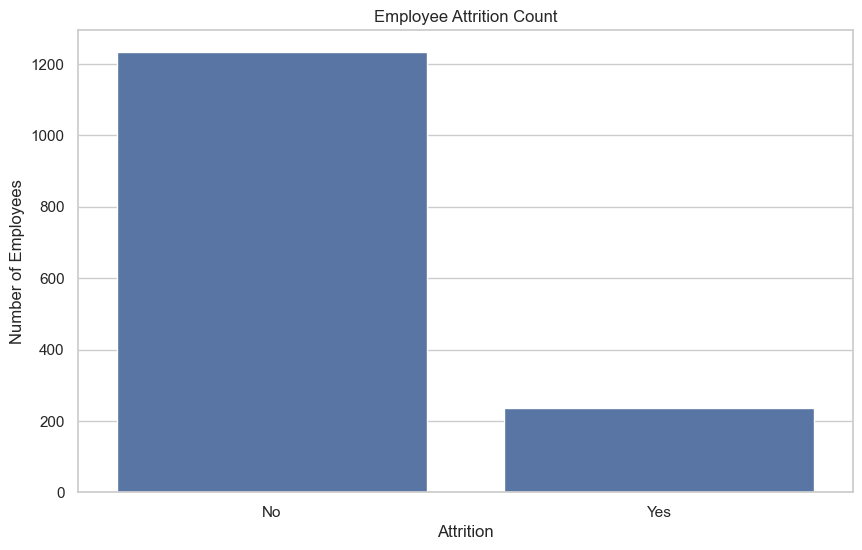

In [45]:
sns.countplot(data=df, x='Attrition')
plt.title('Employee Attrition Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Number of Employees')
plt.xlabel('Attrition')
plt.show()

# Turnover Rate by Department

In [47]:
department_turnover = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False) * 100
print("Turnover Rate by Department:\n", department_turnover)

Turnover Rate by Department:
 Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Attrition, dtype: float64


C:\Users\nithy\AppData\Local\Temp\ipykernel_20912\3882765381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  department_turnover = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False) * 100


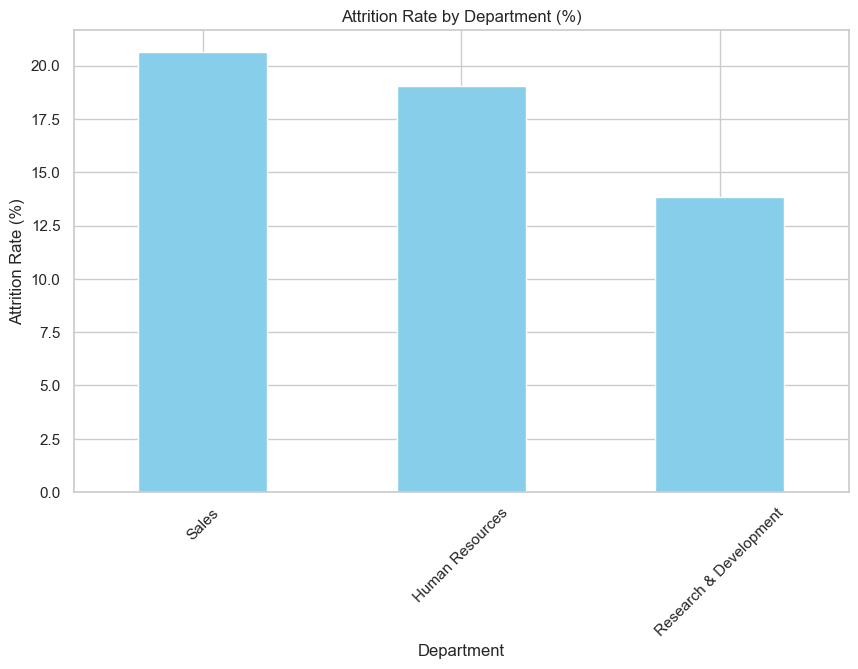

In [49]:
department_turnover.plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Department (%)')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()

# Turnover Rate by YearsAtCompany

In [51]:
df['TenureGroup'] = pd.cut(df['YearsAtCompany'], bins=[0,2,5,10,20,40], labels=['0-2','3-5','6-10','11-20','21+'])

In [53]:
tenure_turnover = df.groupby('TenureGroup')['Attrition'].mean().sort_index() * 100
print("\nTurnover Rate by Tenure Group:\n", tenure_turnover)


Turnover Rate by Tenure Group:
 TenureGroup
0-2      28.859060
3-5      13.824885
6-10     12.276786
11-20     6.666667
21+      12.121212
Name: Attrition, dtype: float64


C:\Users\nithy\AppData\Local\Temp\ipykernel_20912\808566361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_turnover = df.groupby('TenureGroup')['Attrition'].mean().sort_index() * 100


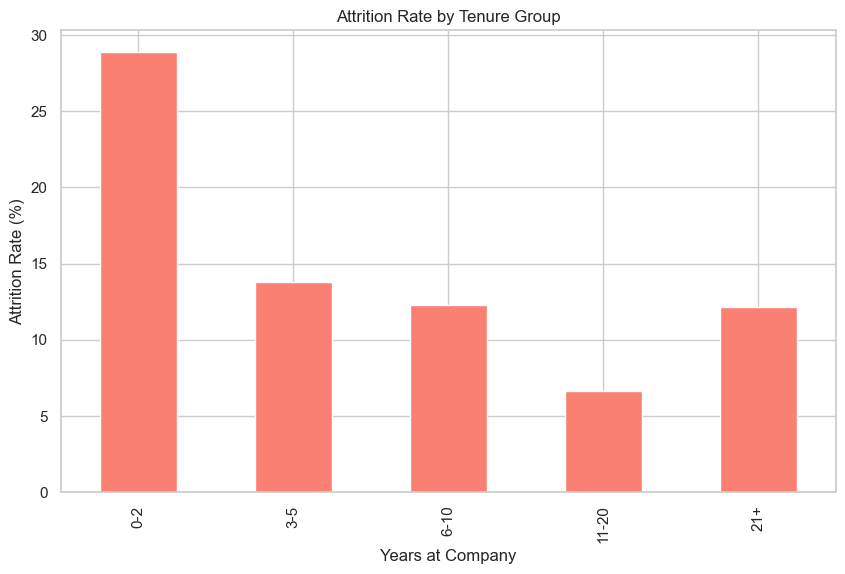

In [55]:
tenure_turnover.plot(kind='bar', color='salmon')
plt.title('Attrition Rate by Tenure Group')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Years at Company')
plt.show()

## Job Satisfaction vs Attrition

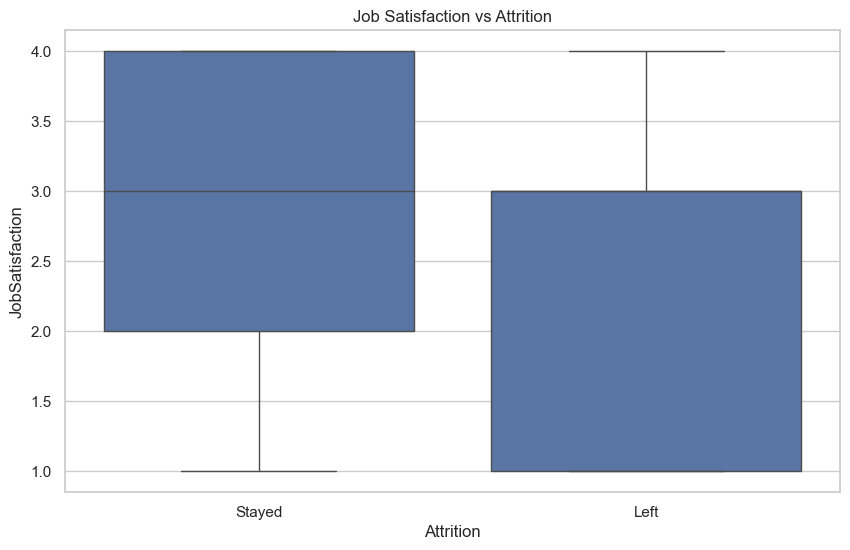

In [57]:
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('Job Satisfaction vs Attrition')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

## Monthly Income vs Attrition

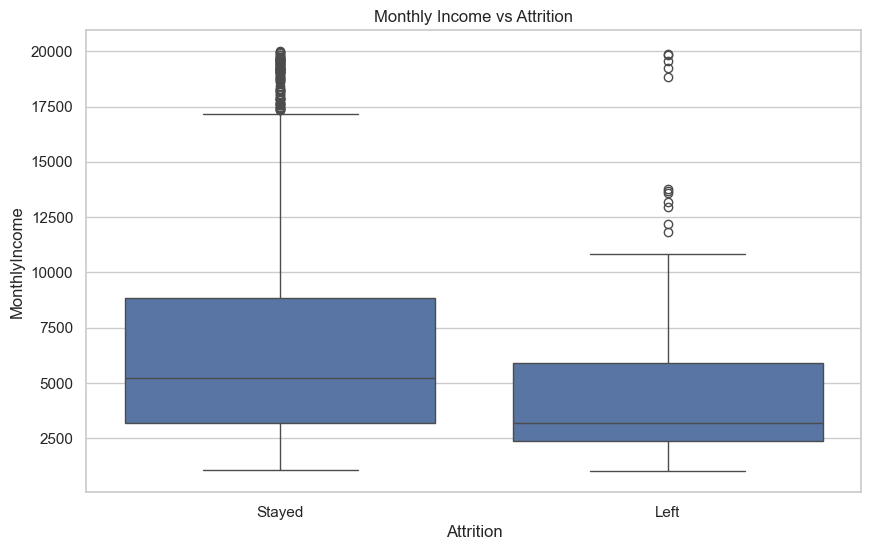

In [59]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income vs Attrition')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

## Years Since Last Promotion vs Attrition

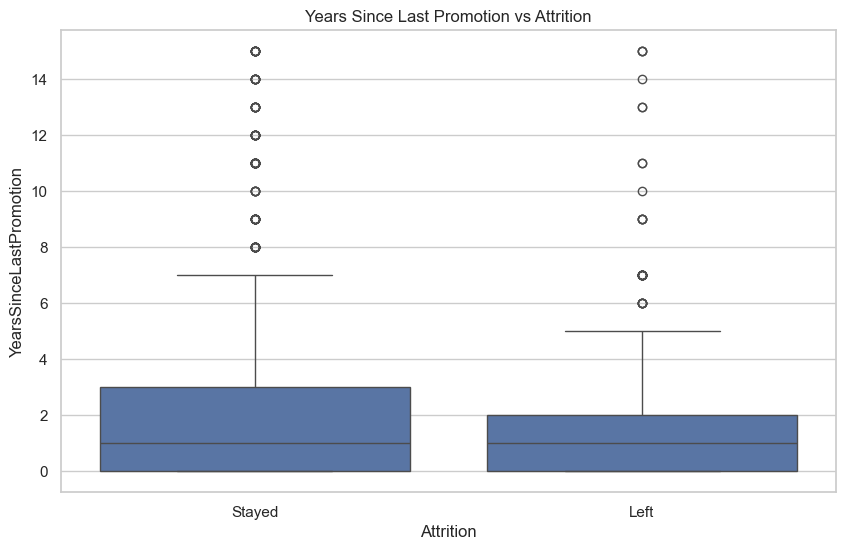

In [61]:
sns.boxplot(data=df, x='Attrition', y='YearsSinceLastPromotion')
plt.title('Years Since Last Promotion vs Attrition')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()